# 1.Data Merging Basics
## 1.1 Inner join

In [1]:
import pandas as pd
taxi_owners = pd.read_pickle('taxi_owners.p')
taxi_veh=pd.read_pickle('G:\\datacamp\\4.Joining Data with pandas\\DataSets\\taxi_vehicles.p')
biz_owners=pd.read_pickle('G:\\datacamp\\4.Joining Data with pandas\\DataSets\\business_owners.p')
licenses=pd.read_pickle('G:\\datacamp\\4.Joining Data with pandas\\DataSets\\licenses.p')
wards=pd.read_pickle('G:\\datacamp\\4.Joining Data with pandas\\DataSets\\ward.p')
zip_demo=pd.read_pickle('G:\\datacamp\\4.Joining Data with pandas\\DataSets\\zip_demo.p')
census=pd.read_pickle('G:\\datacamp\\4.Joining Data with pandas\\DataSets\\census.p')
land_use=pd.read_pickle('G:\\datacamp\\4.Joining Data with pandas\\DataSets\\land_use.p')

#print(pickel_file2)

print(taxi_owners.columns)
print(taxi_veh.columns)

Index(['rid', 'vid', 'owner', 'address', 'zip'], dtype='object')
Index(['vid', 'make', 'model', 'year', 'fuel_type', 'owner'], dtype='object')


You have been tasked with figuring out what the most popular types of fuel used in Chicago taxis are.

In [2]:
taxi_own_veh=taxi_owners.merge(taxi_veh,on='vid')
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')


In [3]:
taxi_own_veh=taxi_owners.merge(taxi_veh,on='vid',suffixes=('_own','_veh'))
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')


In [4]:
print(taxi_own_veh['fuel_type'].value_counts())

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64


## 1.2One-to-many relationships
In a one-to-one relationship, every row in the left table is related to one and only one row in the right table.  in a one-to-many relationship, every row in the left table is related to one or more rows in the right table.



### One-to-many merge
A business may have one or multiple owners. In this exercise, you will continue to gain experience with one-to-many merges by merging a table of business owners, called biz_owners, to the licenses table. 

In [14]:
# Merge the licenses and biz_owners table on account
licenses_owners=licenses.merge(biz_owners,on='account')
#print(licenses_owners)

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby('title').agg({'account':'count'})  #**notice the agg mehod**
counted_df2 = licenses_owners.groupby('title')['account'].value_counts()
print(counted_df)
print(counted_df2)

# Sort the counted_df in desending order
sorted_df = counted_df.sort_values('account', ascending=False)

print(sorted_df.head())

                    account
title                      
ASST. SECRETARY         111
BENEFICIARY               4
CEO                     110
DIRECTOR                146
EXECUTIVE DIRECTOR       10
GENERAL PARTNER          21
INDIVIDUAL              268
LIMITED PARTNER          26
MANAGER                 134
MANAGING MEMBER         878
MEMBER                  884
NOT APPLICABLE           11
OTHER                  1200
PARTNER                 451
PRESIDENT              6259
PRINCIPAL OFFICER        63
SECRETARY              5205
SHAREHOLDER             590
SOLE PROPRIETOR        1658
SPOUSE                   34
TREASURER               447
TRUSTEE                   6
VICE PRESIDENT          970
title            account
ASST. SECRETARY  16301      3
                 57770      3
                 11071      2
                 16964      2
                 1949       2
                           ..
VICE PRESIDENT   85943      1
                 85956      1
                 86083      1
     

## 1.3 Merging multiple DataFrames 

### Total riders in a month
Your goal is to find the total number of rides provided to passengers passing through the Wilson station (station_name == 'Wilson') when riding Chicago's public transportation system on weekdays (day_type == 'Weekday') in July (month == 7). Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is provided

In [15]:
import pandas as pd

cal=pd.read_pickle('G:\\datacamp\\4.Joining Data with pandas\\DataSets\\cta_calendar.p')
ridership=pd.read_pickle('G:\\datacamp\\4.Joining Data with pandas\\DataSets\\cta_ridership.p')
stations=pd.read_pickle('G:\\datacamp\\4.Joining Data with pandas\\DataSets\\stations.p')


ridership_cal_stations = ridership.merge(cal,on=['year','month','day'])\
.merge(stations,on='station_id')
print(ridership_cal_stations.columns)

Index(['station_id', 'year', 'month', 'day', 'rides', 'day_type',
       'station_name', 'location'],
      dtype='object')


In [ ]:
# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))
print(ridership_cal_stations)

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria,'rides'].sum())           ###THIS FILTER AND .LOC METHOD

### Three table merge
To solidify the concept of a three DataFrame merge, practice another exercise. A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. A table with the median income by zip code has been provided to you. 

In [ ]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo,on='zip') \
            			.merge(wards,on='ward')

print(licenses_zip_ward)

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

### One-to-many merge with multiple tables
In this exercise, assume that you are looking to start a business in the city of Chicago. Your perfect idea is to start a company that uses goats to mow the lawn for other businesses. However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell. You will need to merge three tables to help you choose your location. 

The land_use table has info on the percentage of vacant land by city ward. 
The census table has population by ward, and 
the licenses table lists businesses by ward.

In [20]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})
print(pop_vac_lic)
# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant','account','pop_2010'], ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
#print(sorted_pop_vac_lic.head())

                      account
ward pop_2010 vacant         
1    56149    2           253
10   51535    14          130
11   51497    5           201
12   52235    4           255
13   53722    1           101
14   54031    3           202
15   51501    6           103
16   51954    13          156
17   51846    5           109
18   52992    3           124
19   51525    0           125
2    55805    2           301
20   52372    15          123
21   51632    5           123
22   53515    7           156
23   53728    1           147
24   54909    13           98
25   54539    5           321
26   53516    2           175
27   52939    7           497
28   55199    11          189
29   55267    2           154
3    53039    13          173
30   55560    1           186
31   53724    0           173
32   55184    1           248
33   55598    1           208
34   51599    7            99
35   55281    1           169
36   54766    1           145
37   51538    6           173
38   56001

# 2.Merging Tables With Different Join Types
## 2.1 Left Join
. A left join returns all rows of data from the left table and only those rows from the right table where key columns match.

In [22]:

movies=pd.read_pickle('G:\\datacamp\\4.Joining Data with pandas\\DataSets\\movies.p')
taglines=pd.read_pickle('G:\\datacamp\\4.Joining Data with pandas\\DataSets\\taglines.p')
financials=pd.read_pickle('G:\\datacamp\\4.Joining Data with pandas\\DataSets\\financials.p')
movie_to_genres=pd.read_pickle('G:\\datacamp\\4.Joining Data with pandas\\DataSets\\movie_to_genres.p')
print(movies.shape,taglines.shape,financials.shape)


(4803, 4) (3955, 2) (3229, 3)


### 2..1.1 Counting missing rows with left join
The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. 

In [29]:
# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are 
number_of_missing_fin = movies_financials['budget'].isnull().sum()     ### isnull()  gives bool

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


### Enriching a dataset
we can use it to enrich a data set. resulted table will have equal or more observations/rows than the left table

## 3//Other joins
### 3.1//Right Join
mirror opposite of left join . but additional feature is They allow us to tell the merge which key columns from each table to merge the tables. **left_on() , right_on()**

### 3.2///Outer join
An outer join will return all of the rows from both tables regardless if there is a match between the tables.
.
.
.
.
.
### Right join to find unique movies
Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called scifi_movies and another table of action movies called action_movies. Your goal is to find which movies are considered only science fiction movies.

In [ ]:
#print(movie_to_genres)
scifi_movies=movie_to_genres[movie_to_genres['genre']=='Science Fiction']
action_movies=movie_to_genres[movie_to_genres['genre']=='Action']
#print(scifi_movies,action_movies)



# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',suffixes=('_act','_sci'))
#scifi_only=action_scifi[action_scifi['genre_act']=='Null']

scifi_only = action_scifi[action_scifi['genre_act'].isnull()]
print(scifi_only)

If two table has two variable name or column name for the same values
Merge movies and scifi_only using the id column in the left table and the movie_id column in the right table with an inner join.

In [ ]:
# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only,left_on='id', right_on='movie_id')


In [ ]:
pop_movies_full=movies.sort_values('popularity',ascending=False)
pop_movies=pop_movies_full.head(10)
#print(pop_movies)

### Popular genres with right join
What are the genres of the most popular movies? To answer this question, you need to merge data from the movies and movie_to_genres tables. In a table called pop_movies, here, id and ovie id are two same columns with different variable nam e

In [ ]:
genres_movies=movie_to_genres.merge(pop_movies, left_on='movie_id', right_on='id', how='right')
#print(movie_to_genres,pop_movies)



# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies=movie_to_genres.merge(pop_movies, left_on='movie_id', right_on='id', how='right')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

In [ ]:

###### not gonna run
#Save to iron_1_and_2 the merge of iron_1_actors (left) with iron_2_actors tables with an outer join on the id column, and set suffixes to ('_1','_2').
#Create an index that returns True if name_1 or name_2 are null, and False otherwise.


# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     on='id', suffixes=['_1','_2'], how='outer')

#print(iron_1_actors)
#print(iron_1_and_2)
# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) |  (iron_1_and_2['name_2'].isnull()))     ## or operator. index m retures bool

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

# 3.3 Merging a table to itself
## Self join
Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. 

. You have been given a table called crews, which has columns id, job, and name. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.


The pandas module limits you to one merge where you merge a table to itself. You cannot repeat this process over and over.

In [30]:
crews=pd.read_pickle('G:\\datacamp\\4.Joining Data with pandas\\DataSets\\crews.p')
print(crews.columns)


# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))

                                
print(crews_self_merged)
# Create a Boolean index to select the appropriate                  ##Create a Boolean index, named boolean_filter, that selects rows from the left.
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') &   # table with the job of 'Director' and avoids rows with the job of 'Director' in the right table
     (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]
print(direct_crews)

Index(['id', 'department', 'job', 'name'], dtype='object')
           id department_dir   job_dir           name_dir department_crew  \
0       19995        Editing    Editor  Stephen E. Rivkin         Editing   
1       19995        Editing    Editor  Stephen E. Rivkin           Sound   
2       19995        Editing    Editor  Stephen E. Rivkin      Production   
3       19995        Editing    Editor  Stephen E. Rivkin       Directing   
4       19995        Editing    Editor  Stephen E. Rivkin         Writing   
...       ...            ...       ...                ...             ...   
834189  25975      Directing  Director           Jon Gunn       Directing   
834190  25975      Directing  Director         Brett Winn      Production   
834191  25975      Directing  Director         Brett Winn       Directing   
834192  25975      Directing  Director         Brett Winn       Directing   
834193  25975      Directing  Director         Brett Winn       Directing   

                

## Merging on indexes
### Index merge for movie ratings
To practice merging on indexes, you will merge movies and a table called ratings that holds info about movie ratings. Make sure your merge returns all of the rows from the movies table and not all the rows of ratings table need to be included in the result.

In [ ]:
ratings=pd.read_pickle('G:\\datacamp\\4.Joining Data with pandas\\DataSets\\ratings.p')
print(ratings)

#Merge movies and ratings on the index and save to a variable called movies_ratings, ensuring that all of the rows from the
#movies table are returned.
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings,on='id',how='left')

# Print the first few rows of movies_ratings
print(movies_ratings.head())

### Do sequels earn more?
It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the sequels and financials tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the sequels table and not all the rows of financials table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

In [ ]:
sequels=pd.read_pickle('G:\\datacamp\\4.Joining Data with pandas\\DataSets\\sequels.p')
print(sequels.columns,financials.columns)

#With the sequels table on the left, merge to it the financials table on index named id, ensuring that all the rows from 
#the sequels are returned and some rows from the other table may not be returned, Save the results to sequels_fin.

sequels_fin = sequels.merge(financials,on='id',how='left')

print(sequels_fin)
#Merge the sequels_fin table to itself with an inner join, where the left and right tables merge on sequel and id 
#respectively with suffixes equal to ('_org','_seq'), saving to orig_seq
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index=True,
                             suffixes=['_org','_seq'])    ##int() argument must be a string, a bytes-like object or a number, not 'NAType'
##Nan value er jonno pera hochhe. we can solve it. but datacamp er window te eta inpur niye result dise


print(orig_seq)      


# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values('diff', ascending=False).head())

 Additionally, since we are merging on indexes, we need to set left_index and right_index to True. These arguments take only True or False. Whenever we are using the left_on or right_on arguments with an index, we need to set the respective left_index and right_index arguments to True. The left_index and right_index tell the merge method to use the separate indexes.

# 3.Advanced Merging and Concatenating
## 3.1 Filtering joins-semi join and anti join
### Semi join
A semi join filters the left table down to those observations that have a match in the right table. It is similar to an inner join where only the intersection between the tables is returned, but unlike an inner join, only the columns from the left table are shown. Finally, no duplicate rows from the left table are returned, even if there is a one-to-many relationship. 

### anti join
 An anti join returns the observations in the left table that do not have a matching observation in the right table. It also only returns the columns from the left table

### Performing an anti join
In our music streaming company dataset, each customer is assigned an employee representative to assist them. In this exercise, filter the employee table by a table of top customers, returning only those employees who are not assigned to a customer. The results should resemble the results of an anti join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

The top_cust and employees tables have been provided for you. table data NNNNNNNNAAAAAAAAAIIIIIIIIIII

**** we'll use the indicator argument and set it to True. With indicator set to True, the merge method adds a column called "_merge" to the output. This column tells the source of each row. For example, the first four rows found a match in both tables, whereas the last can only be found in the left table.***

In [31]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', 
                            how='left', indicator=True)

###Select the srid column of empl_cust and the rows where _merge is 'left_only'. Save the result to srid_list
# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']


# Get employees not working with top customers
print(employees[employees['srid'].isin(srid_list)])

NameError: name 'employees' is not defined

### Performing a semi join
Some of the tracks that have generated the most significant amount of revenue are from TV-shows or are other non-musical audio. You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi join to find the top revenue-generating non-musical tracks..

The tables non_mus_tcks, top_invoices, and genres have NOOOOTTT been loaded for you. ***check it**

In [ ]:
# Merge the non_mus_tck and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices, on='tid')

# Use .isin() to subset non_mus_tcsk to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

 
# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':'count'})

# Merge the genres table to cnt_by_gid on gid and print
print(cnt_by_gid.merge(genres, on='gid'))

### Concatenate DataFrames together vertically
see pdf/// ch 3

In [ ]:
# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master,tracks_ride,tracks_st],
                               ignore_index=True,
                               sort=True)               ##See the THIRD BRACKET to specify the tables???
print(tracks_from_albums)

In [ ]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master,tracks_ride,tracks_st],
                               join='inner',
                               sort=True)           ###join argument
print(tracks_from_albums)

### Concatenating with keys
The leadership of the music streaming company has come to you and asked you for assistance in analyzing sales for a recent business quarter. They would like to know which month in the quarter saw the highest average invoice total. You have been given three tables with invoice data named inv_jul, inv_aug, and inv_sep. Concatenate these tables into one to create a graph of the average monthly invoice total.

In [32]:

##########2 extra things to notice, agg({}) method and .plot(kind='')#########


import numpy as np
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul,inv_aug,inv_sep], 
                            keys=['7Jul','8Aug','9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind='bar')
plt.show()

NameError: name 'inv_jul' is not defined

#### Using the append method
The .concat() method is excellent when you need a lot of control over how concatenation is performed. However, if you do not need as much control, then the .append() method is another option. You'll try this method out by appending the track lists together from different Metallica albums. From there, you will merge it with the invoice_items table to determine which track sold the most.

In [ ]:
# Use the .append() method to combine the tracks tables
metallica_tracks = tracks_ride.append([tracks_master,tracks_st], sort=False)

# Merge metallica_tracks and invoice_items
tracks_invoices = metallica_tracks.merge(invoice_items,on='tid',how='inner')

# For each tid and name sum the quantity sold
tracks_sold = tracks_invoices.groupby(['tid','name']).agg({'quantity':'sum'})

# Sort in decending order by quantity and print the results
print(tracks_sold.sort_values('quantity',ascending=False))

#### Verifying integrity

In [ ]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18,classic_19],ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18,pop_19],ignore_index=True)

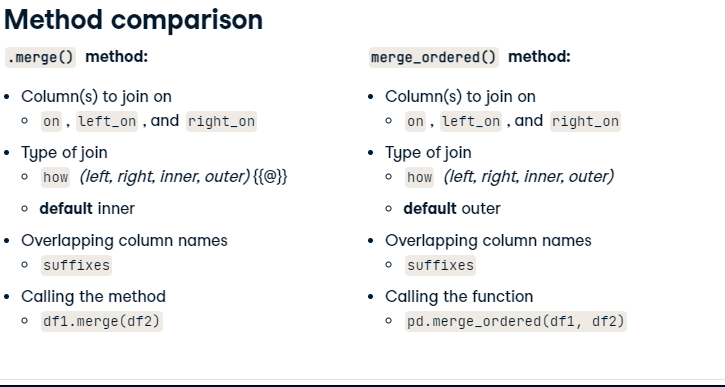

# 4.Merging Ordered and Time-Series Data
## 4.1merge_ordered()
### Correlation between GDP and S&P500
In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

Two tables have been provided for you, named sp500, and gdp.



In [ ]:
##GDP
 country code  year        gdp
3           USA  2010  1.499e+13
7           USA  2011  1.554e+13
11          USA  2012  1.620e+13
15          USA  2012  1.620e+13
19          USA  2013  1.678e+13
23          USA  2014  1.752e+13
27          USA  2015  1.822e+13
31          USA  2016  1.871e+13
35          USA  2017  1.949e+13
39          USA  2018  2.049e+13    date  returns

In [ ]:
##SP500
0  2008   -38.49
1  2009    23.45
2  2010    12.78
3  2011     0.00
4  2012    13.41
5  2014    11.39
6  2015    -0.73
7  2016     9.54
8  2017    19.42
9  2013    29.60

In [ ]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left')

In [34]:
country code    year        gdp    date  returns
0           NaN     NaN        NaN  2008.0   -38.49
1           NaN     NaN        NaN  2009.0    23.45
2           USA  2010.0  1.499e+13  2010.0    12.78
3           USA  2011.0  1.554e+13  2011.0     0.00
4           USA  2012.0  1.620e+13  2012.0    13.41
5           USA  2012.0  1.620e+13  2012.0    13.41
6           USA  2013.0  1.678e+13  2013.0    29.60
7           USA  2014.0  1.752e+13  2014.0    11.39
8           USA  2015.0  1.822e+13  2015.0    -0.73
9           USA  2016.0  1.871e+13  2016.0     9.54
10          USA  2017.0  1.949e+13  2017.0    19.42
11          USA  2018.0  2.049e+13     NaN      NaN

SyntaxError: invalid syntax (2631917811.py, line 1)

In [33]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date',how='left',fill_method='ffill')



# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['gdp','returns']]

# Print gdp_returns correlation
print(gdp_returns.corr())

NameError: name 'gdp' is not defined

#### Phillips curve using merge_ordered()
There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

The tables unemployment and inflation have been loaded for you.

In [35]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation,unemployment,on='date',how='inner')

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(x='unemployment_rate',y='cpi',kind='scatter')
plt.show()

NameError: name 'inflation' is not defined

#### merge_ordered() caution, multiple columns
When using merge_ordered() to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for the Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.

In [36]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp,pop,on=['date','country'],fill_method='ffill')

date_ctry = pd.merge_ordered(gdp,pop,on=['country','date'],fill_method='ffill')

## jeta age dibo seta sort kore merge korbe. so age country dile country sort kore output dibe

NameError: name 'gdp' is not defined

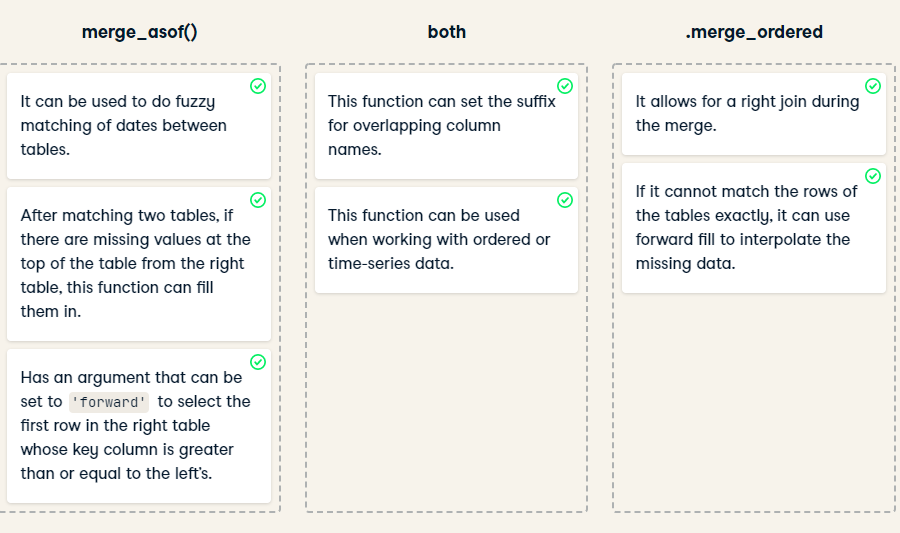

### 4.2 Using merge_asof()
The merge_asof() method is similar to an ordered left join. It has similar features as merge_ordered(). However, unlike an ordered left join, merge_asof() will match on the nearest value columns rather than equal values. This brings up an important point - whatever columns you merge on must be sorted. ALSO FOR TRAINING SEThhk

 First, you might think of this method when you are working with data sampled from a process and the dates or times may not exactly align. This is similar to what we did in our example. It could also be used when you are working on a time-series training set, where you do not want any events from the future to be visible before that point in time. AND ALSO FOR TRAINING

Using merge_asof() to study stocks
You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. 

In [37]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm,wells,on='date_time',suffixes=('', '_wells'),direction='nearest')

print(jpm_wells)


jpm_wells_bac=pd.merge_asof(jpm_wells,bac,on='date_time',suffixes=('_jpm', '_bac'),direction='nearest')


# Compute price diff
price_diffs = jpm_wells_bac.diff()

price_diffs.plot(y=['close_jpm','close_wells','close_bac'])
plt.show()

plt.show()

NameError: name 'jpm' is not defined

#### Using merge_asof() to create dataset
The merge_asof() function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given gdp, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table recession has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. 

In [ ]:
Using merge_asof(), merge gdp and recession on date, with gdp as the left table. Save to the variable gdp_recession.
Create a list using a list comprehension and a conditional expression, named is_recession, where for each row if the gdp_recession['econ_status'] value is equal to 'recession' then enter 'r' else 'g'.
Using gdp_recession, plot a bar chart of gdp versus date, setting the color argument equal to is_recession

In [ ]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on='date')          #######PRACTICE#####

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]  #####NEW333#####

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()

### 4.3 Selecting data with .query()

a pandas method for selecting data from the table called the query() method. pandas provides many methods for selecting data, and query() is one of them.

2. The .query() method
The query() method accepts an input string that it will use to select rows to return from the table. 


### Reshaping data with .melt()

In [ ]:
print(ur_wide)

# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars='year',var_name='month',value_name='unempl_rate')

print(ur_tall)
# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'] + '-' + ur_tall['month'])
print(ur_tall)
# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values('date',ascending=True)

# Plot the unempl_rate by date
ur_sorted.plot(x='date', y='unempl_rate')
plt.show()

In [ ]:
###ur_wide
    year  jan  feb  mar  apr  ...  aug  sep  oct  nov  dec
    0   2010  9.8  9.8  9.9  9.9  ...  9.5  9.5  9.4  9.8  9.3
    1   2011  9.1  9.0  9.0  9.1  ...  9.0  9.0  8.8  8.6  8.5
    2   2012  8.3  8.3  8.2  8.2  ...  8.1  7.8  7.8  7.7  7.9
    3   2013  8.0  7.7  7.5  7.6  ...  7.2  7.2  7.2  6.9  6.7
    4   2014  6.6  6.7  6.7  6.2  ...  6.1  5.9  5.7  5.8  5.6
    5   2015  5.7  5.5  5.4  5.4  ...  5.1  5.0  5.0  5.1  5.0
    6   2016  4.9  4.9  5.0  5.0  ...  4.9  5.0  4.9  4.7  4.7
    7   2017  4.7  4.6  4.4  4.4  ...  4.4  4.2  4.1  4.2  4.1
    8   2018  4.1  4.1  4.0  4.0  ...  3.8  3.7  3.8  3.7  3.9
    9   2019  4.0  3.8  3.8  3.6  ...  3.7  3.5  3.6  3.5  3.5
    10  2020  3.6  3.5  4.4  NaN  ...  NaN  NaN  NaN  NaN  NaN
    
###after .melt()
 year month  unempl_rate
    0    2010   jan          9.8
    1    2011   jan          9.1
    2    2012   jan          8.3
    3    2013   jan          8.0
    4    2014   jan          6.6
    ..    ...   ...          ...
    127  2016   dec          4.7
    128  2017   dec          4.1
    129  2018   dec          3.9
    130  2019   dec          3.5
    131  2020   dec          NaN
    
    
    
####
year month  unempl_rate       date
    0    2010   jan          9.8 2010-01-01
    1    2011   jan          9.1 2011-01-01
    2    2012   jan          8.3 2012-01-01
    3    2013   jan          8.0 2013-01-01
    4    2014   jan          6.6 2014-01-01
    ..    ...   ...          ...        ...
    127  2016   dec          4.7 2016-12-01
    128  2017   dec          4.1 2017-12-01
    129  2018   dec          3.9 2018-12-01
    130  2019   dec          3.5 2019-12-01
    131  2020   dec          NaN 2020-12-01
    

In [ ]:
It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the .melt() method to reshape this table.

Additionally, you will use the .query() method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.

The tables ten_yr and dji have been loaded for you.

Instructions
70 XP
Use .melt() on ten_yr to unpivot everything except the metric column, setting var_name='date' and value_name='close'. Save the result to bond_perc.
Using the .query() method, select only those rows were metric equals 'close', and save to bond_perc_close.
Use merge_ordered() to merge dji (left table) and bond_perc_close on date with an inner join, and set suffixes equal to ('_dow', '_bond'). Save the result to dow_bond.
Using dow_bond, plot only the Dow and bond values.

In [ ]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars='metric',var_name='date',value_name='close')

print(bond_perc)
# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric=="close"')

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji,bond_perc_close,on='date',how='inner',suffixes=['_dow', '_bond'])

print(dow_bond)
# Plot only the close_dow and close_bond columns
dow_bond.plot(y=['close_dow','close_bond'], x='date', rot=90)
plt.show()

In [ ]:
###DATE        TIMEEEEE###

data['month'] = pd.to_datetime(data['date']).dt.month
DF[''].unique()
users_last_10 = set(joined_pr.nlargest(10, 'date')['user'])